# Phishing URL Detection


From Wikipedia, https://en.wikipedia.org/wiki/Phishing

> Phishing is the fraudulent attempt to obtain sensitive information such as usernames, passwords and credit card details, often for malicious reasons, by disguising as a trustworthy entity in an electronic communication. The word is a neologism created as a homophone of fishing due to the similarity of using a bait in an attempt to catch a victim. The annual worldwide impact of phishing could be as high as US$5 billion.
>
> Phishing is typically carried out by email spoofing or instant messaging, and it often directs users to enter personal information at a fake website, the look and feel of which are identical to the legitimate site, the only difference being the URL of the website in concern. Communications purporting to be from social web sites, auction sites, banks, online payment processors or IT administrators are often used to lure victims. Phishing emails may contain links to websites that distribute malware.
>
> Phishing is an example of social engineering techniques used to deceive users, and it exploits weaknesses in current web security. Attempts to deal with the growing number of reported phishing incidents include legislation, user training, public awareness, and technical security measures.

Here's an example of a real phishing email sent in 2011 by attackers looking to get login credentials for Facebook users:

<pre>
LAST WARNING : Your account is reported to have violated the policies that are considered annoying or insulting Facebook users.

Until we system will disable your account within 24 hours if you do not do the reconfirmation.

Please confirm your account below:

[ Link Removed ]

Thanks.
The Facebook Team
Copyright facebook © 2011 Inc. All rights reserved.
</pre>

A victim clicking on the Phishing link would be taken to a site that looked like a pretty good copy of the Facebook login screen.

<img src="images/Not_Facebook.png">

Here are some examples of the links used in emails sent by the attackers running this phishing campaign:

**Note**: These links may be dangerous to your computer. Our practice will be to "neuter" links by wrapping certain characters with square brackets so that you cannot click on these links, or accidentally copy/paste them into your browser.

**CAUTION: DO NOT CLICK ON OR VISIT THESE LINKS!!**
<pre>
http[:]//team-welcome[.]at[.]ua/facebook-support[.]html
http[:]//reportedpages[.]at[.]ua/facebook-support-account[.]html
http[:]//www[.]facebooks[.]cloud/PayPlls[.]CEanada[.]tNZnZZlR3ZdyZZ-5RkZZDRTZZBy
http[:]//www[.]greenaura[.]net/appz[.]westpac/westpac[.]appz/login[.]php
http[:]//www[.]irastrum[.]com/wp-admin/mail[.]yahoo[.]com/
http[:]//appleid[.]apple[.]com-subscriptions[.]manager508158125[.]kevinfoley[.]com
</pre>
**CAUTION: DO NOT CLICK ON OR VISIT THESE LINKS!!**


Something smells a little phishy about these links. Given a close look by a human, you'd probably be able to decide pretty quickly if the link was really sent by Facebook or not. But billions of people get hundreds or thousands of emails each every day! How can defenders keep up with the onslaught by the phishers?

## The Problem

We want to use methods from Machine Learning to build a computer program that will automatically flag links it thinks are phishing attempts. We can do this by studying the problem, looking at data, and learning a decision rule.

The dataset we will be using is named "Phishing_Mitre_Dataset_Summer_of_AI.csv". 

#### Analyze the data, build features, or use the existing features in the data to build a model, and report your findings. We will use the F1 score to evaluate the final models using a test set that we have set aside. 

## Explore Some Data

Let's take a look at the provided features on our set of URLs. 

* Create Age (in Months): The age of the domain. If the value is -1, that information is not available or the domain has been deleted. 
* Expiry Age (in Months): The amount of months until the domain expires. If the value is negative, that information is not available or the domain has been deleted.
* Update Age (in Days): The last time the domain was updated. If the value is -1, that information is not available or the domain was deleted.
* URL: The URL of the website. Three periods have been added to the end of each URL to prevent the URL from being clicked for security purposes. 
* Label: A label to determine whether a website is a phishing link or not. 0 denotes a website that is not a phishing link, 1 denotes a website is a phishing link. 

In [103]:
import pandas as pd
import numpy as np
import math
from sklearn.linear_model import LogisticRegression
from tld import get_tld

In [2]:
df = pd.read_csv('Training Data/Phishing_Mitre_Dataset_Summer_of_AI.csv')

In [37]:
df.describe()

,create_age(months),expiry_age(months),update_age(days),Label
count,4799.000000,4799.000000,4799.000000,4799.000000
mean,91.288810,12.264430,272.264638,0.532403
std,92.868921,20.033764,618.276458,0.499001
min,-1.000000,-78.000000,-115.000000,0.000000
25%,-1.000000,-1.000000,-1.000000,0.000000
50%,56.000000,7.000000,91.000000,1.000000
75%,188.000000,12.000000,292.500000,1.000000
max,365.000000,120.000000,9959.000000,1.000000


In [89]:
df.head(20)

,create_age(months),expiry_age(months),update_age(days),URL,Label,url_length,url_entropy,3rd_level_domain
0,-1,-1,-1,http://account-google-com.ngate.my/c44cca40176...,1,70,4.612783,False
1,212,16,663,http://www.coffeespecialties.com/...,0,36,3.819114,True
2,-1,-1,-1,http://black.pk/wp-content/2013/04/bp.postale/...,1,73,4.370385,False
3,198,6,186,http://atomicsoda.com/manutd...,0,31,3.695501,False
4,240,24,1684,http://bostoncoffeecake.com/...,0,31,3.760017,False
5,-1,-1,-1,http://www.durst.de/...,0,23,3.311636,True
6,98,10,57,http://www.jobofmine.com/...,0,28,3.740416,True
7,2,10,61,http://safetem.com/fcid/login.php?cmd=login_su...,1,73,4.758270,False
8,21,3,280,http://elicafe.com/...,1,22,3.606937,False
9,-1,-1,-1,http://www.vgl.ucdavis.edu/informatics/strand....,0,52,4.235424,True


In [109]:
def entropy(url_string):
        string = url_string.strip()
        prob = [float(string.count(c)) / len(string) for c in dict.fromkeys(list(string))]
        entropy = sum([(p * math.log(p) / math.log(2.0)) for p in prob])
        return abs(entropy)
    
def has_www(url_string):
    if (url_string.find('www.') == -1):
        return False
    else:
        return True
    
def find_between(url_string):
    try:
        return get_tld(url_string, fix_protocol=True)
    except:
        return ''
    
#def risky_TLD(url_string):
#    '.COM', '.TK', '.LT' '.C'

In [112]:
df['url_length'] = df['URL'].apply(len)
df['url_entropy'] = df['URL'].apply(entropy)
df['3rd_level_domain'] = df['URL'].apply(has_www)
df['TLD'] = df['URL'].apply(find_between)
df.head(20)

,create_age(months),expiry_age(months),update_age(days),URL,Label,url_length,url_entropy,3rd_level_domain,top_level_domain,TLD
0,-1,-1,-1,http://account-google-com.ngate.my/c44cca40176...,1,70,4.612783,False,my,my
1,212,16,663,http://www.coffeespecialties.com/...,0,36,3.819114,True,com,com
2,-1,-1,-1,http://black.pk/wp-content/2013/04/bp.postale/...,1,73,4.370385,False,pk,pk
3,198,6,186,http://atomicsoda.com/manutd...,0,31,3.695501,False,com,com
4,240,24,1684,http://bostoncoffeecake.com/...,0,31,3.760017,False,com,com
5,-1,-1,-1,http://www.durst.de/...,0,23,3.311636,True,de,de
6,98,10,57,http://www.jobofmine.com/...,0,28,3.740416,True,com,com
7,2,10,61,http://safetem.com/fcid/login.php?cmd=login_su...,1,73,4.758270,False,com,com
8,21,3,280,http://elicafe.com/...,1,22,3.606937,False,com,com
9,-1,-1,-1,http://www.vgl.ucdavis.edu/informatics/strand....,0,52,4.235424,True,edu,edu


In [64]:
df.describe()

,create_age(months),expiry_age(months),update_age(days),Label,url_length,url_entropy
count,4799.000000,4799.000000,4799.000000,4799.000000,4799.000000,4799.000000
mean,91.288810,12.264430,272.264638,0.532403,47.036049,4.046555
std,92.868921,20.033764,618.276458,0.499001,17.638505,0.359996
min,-1.000000,-78.000000,-115.000000,0.000000,17.000000,3.058746
25%,-1.000000,-1.000000,-1.000000,0.000000,31.000000,3.784898
50%,56.000000,7.000000,91.000000,1.000000,42.000000,4.014988
75%,188.000000,12.000000,292.500000,1.000000,65.000000,4.280159
max,365.000000,120.000000,9959.000000,1.000000,107.000000,5.183195


In [44]:
df['URL'].iloc[8]

'http://elicafe.com/...'

In [35]:
neg_create = df[(df['create_age(months)'] == -1) | (df['expiry_age(months)'] == -1) | (df['update_age(days)'] == -1)] 
neg_create.shape[0] / df.shape[0]

0.318608043342363

In [28]:
neg_exp = df[df['expiry_age(months)'] == -1]
neg_exp.count()

create_age(months)    1278
expiry_age(months)    1278
update_age(days)      1278
URL                   1278
Label                 1278
dtype: int64

In [29]:
neg_up = df[df['update_age(days)'] == -1]
neg_up.count()

create_age(months)    1476
expiry_age(months)    1476
update_age(days)      1476
URL                   1476
Label                 1476
dtype: int64

In [4]:
df.describe()

,create_age(months),expiry_age(months),update_age(days),Label
count,4799.000000,4799.000000,4799.000000,4799.000000
mean,91.288810,12.264430,272.264638,0.532403
std,92.868921,20.033764,618.276458,0.499001
min,-1.000000,-78.000000,-115.000000,0.000000
25%,-1.000000,-1.000000,-1.000000,0.000000
50%,56.000000,7.000000,91.000000,1.000000
75%,188.000000,12.000000,292.500000,1.000000
max,365.000000,120.000000,9959.000000,1.000000


In [5]:
df['Label'].sum() / df['Label'].count()

0.53240258387164

In [8]:
len(df['URL'].unique())

4691

In [9]:
df.shape

(4799, 5)

In [118]:
pos = df[df['Label'] == 1]
neg = df[df['Label'] == 0]

In [135]:
pos.shape

(2555, 10)

In [136]:
neg.shape

(2244, 10)

In [133]:
pos.groupby(by = ['TLD']).count().sort_values(by = 'top_level_domain', ascending = False)

,create_age(months),expiry_age(months),update_age(days),URL,Label,url_length,url_entropy,3rd_level_domain,top_level_domain
TLD,,,,,,,,,
com,1101,1101,1101,1101,1101,1101,1101,1101,1101
com.br,187,187,187,187,187,187,187,187,187
net,98,98,98,98,98,98,98,98,98
com.au,83,83,83,83,83,83,83,83,83
cc,78,78,78,78,78,78,78,78,78
...,...,...,...,...,...,...,...,...,...
gda.pl,1,1,1,1,1,1,1,1,1
gd,1,1,1,1,1,1,1,1,1
blogspot.se,1,1,1,1,1,1,1,1,1


In [134]:
neg.groupby(by = ['TLD']).count().sort_values(by = 'top_level_domain', ascending = False)

,create_age(months),expiry_age(months),update_age(days),URL,Label,url_length,url_entropy,3rd_level_domain,top_level_domain
TLD,,,,,,,,,
com,1484,1484,1484,1484,1484,1484,1484,1484,1484
org,175,175,175,175,175,175,175,175,175
co.uk,106,106,106,106,106,106,106,106,106
edu,90,90,90,90,90,90,90,90,90
net,90,90,90,90,90,90,90,90,90
ca,24,24,24,24,24,24,24,24,24
de,24,24,24,24,24,24,24,24,24
nic.in,23,23,23,23,23,23,23,23,23
in,22,22,22,22,22,22,22,22,22


In [75]:
print(pos['url_entropy'].mean())
print(neg['url_entropy'].mean())

4.262824012287233
3.800312408588276


In [76]:
print(pos['url_length'].mean())
print(neg['url_length'].mean())

58.32681017612524
34.18048128342246


In [88]:
print(pos['3rd_level_domain'].sum() / pos.shape[0])
print(neg['3rd_level_domain'].sum() / neg.shape[0])

0.324853228962818
0.7994652406417112


(array([1798.,  617.,   45.,   39.,   16.,   10.,    6.,    6.,    4.,
          14.]),
 array([ -3. ,   8.2,  19.4,  30.6,  41.8,  53. ,  64.2,  75.4,  86.6,
         97.8, 109. ]),
 <BarContainer object of 10 artists>)

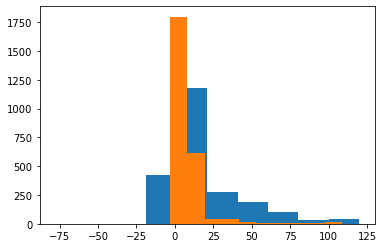

In [19]:
plt.hist(neg['expiry_age(months)'])
plt.hist(pos['expiry_age(months)'])

(array([435.,  36.,  85., 164., 340., 696., 381., 101.,   5.,   1.]),
 array([ -1. ,  35.6,  72.2, 108.8, 145.4, 182. , 218.6, 255.2, 291.8,
        328.4, 365. ]),
 <BarContainer object of 10 artists>)

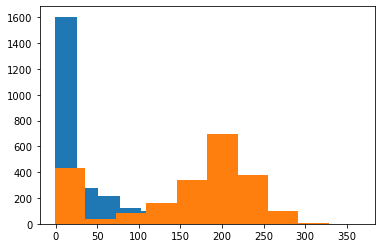

In [21]:
plt.hist(pos['create_age(months)'])
plt.hist(neg['create_age(months)'])

Questions:

what to do with negative values?

Any features we want to develop? -- parse URL

Length of URL

Normalize features?

In [98]:
find_between('http://account-google-com.ngate.my/c44cca40176...')

'ngate.my'